## **載入必要套件**

In [120]:
import numpy as np 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_train.csv
/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_test_NO_answers_shuffled.csv
/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_test_sample_submissions.csv


## **讀取資料**

In [121]:
data = pd.read_csv('/kaggle/input/introml-nccu-2024-task-1/introml_2024_task1_train.csv')
data

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f11,f12,f13,f14,f15,f16,f17,f18,f19,class
0,f01,f11,f21,f31,f40,f50,f61,f71,f81,f90,...,f111,f121,f130,f141,f150,f161,f170,f181,f191,C0
1,f00,f10,f21,f31,f40,f51,f60,f71,f81,f91,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C0
2,f01,f10,f21,f30,f40,f50,f61,f71,f81,f90,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C0
3,f00,f10,f21,f30,f40,f51,f60,f71,f80,f90,...,f111,f121,f130,f140,f150,f161,f171,f181,f191,C0
4,f00,f11,f21,f30,f40,f50,f60,f71,f81,f90,...,f111,f121,f131,f141,f151,f161,f170,f181,f191,C0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,f00,f10,f21,f31,f40,f50,f60,f70,f80,f90,...,f111,f121,f131,f140,f150,f160,f171,f180,f190,C2
2396,f01,f10,f21,f30,f40,f51,f60,f70,f80,f90,...,f111,f121,f131,f141,f150,f160,f171,f180,f191,C2
2397,f00,f11,f21,f31,f41,f51,f60,f71,f81,f90,...,f111,f121,f131,f140,f150,f160,f170,f180,f190,C2
2398,f00,f11,f21,f31,f41,f51,f60,f71,f80,f91,...,f111,f121,f131,f141,f150,f161,f170,f181,f191,C2


## **資料視覺化**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Axes: xlabel='f1', ylabel='class'>

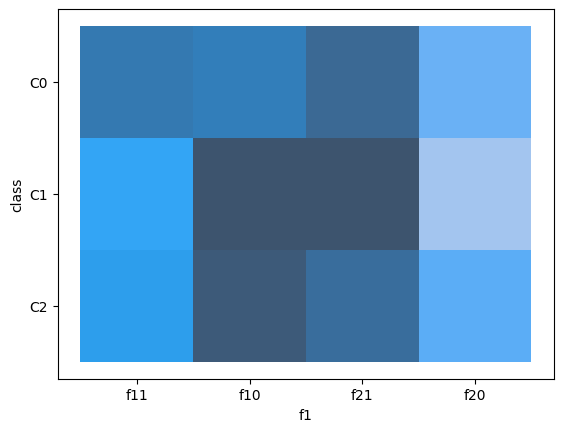

In [122]:
#sns.histplot(data = data, x="f0", y = "class")
sns.histplot(data = data, x="f1", y = "class")
sns.histplot(data = data, x="f2", y = "class")

In [123]:
# 初始化 OrdinalEncoder
encoder = OrdinalEncoder()

# 對整個 DataFrame 進行編碼
encoded_data = encoder.fit_transform(data)

# 轉回 DataFrame 並加上列名
encoded_df = pd.DataFrame(encoded_data, columns=data.columns)

# 查看編碼後的數據
print(encoded_df['class'])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2395    2.0
2396    2.0
2397    2.0
2398    2.0
2399    2.0
Name: class, Length: 2400, dtype: float64


In [124]:
X = encoded_df.iloc[:, :-1]
Y = encoded_df['class']

In [125]:
# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

In [126]:
# 訓練分類模型
clf = RandomForestClassifier(random_state = 52)
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

In [127]:
# 評估模型
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.778125

Classification Report:
               precision    recall  f1-score   support

          C0       0.79      0.81      0.80       320
          C1       0.79      0.78      0.78       320
          C2       0.75      0.75      0.75       320

    accuracy                           0.78       960
   macro avg       0.78      0.78      0.78       960
weighted avg       0.78      0.78      0.78       960

